In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# The code was removed by Watson Studio for sharing.

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [4]:
df_data_1.dtypes

airline                   object
avail_seat_km_per_week     int64
incidents_85_99            int64
fatal_accidents_85_99      int64
fatalities_85_99           int64
incidents_00_14            int64
fatal_accidents_00_14      int64
fatalities_00_14           int64
dtype: object

Text(0.5, 1.0, 'Airline and Fatal Accidents from 1985 to 1999')

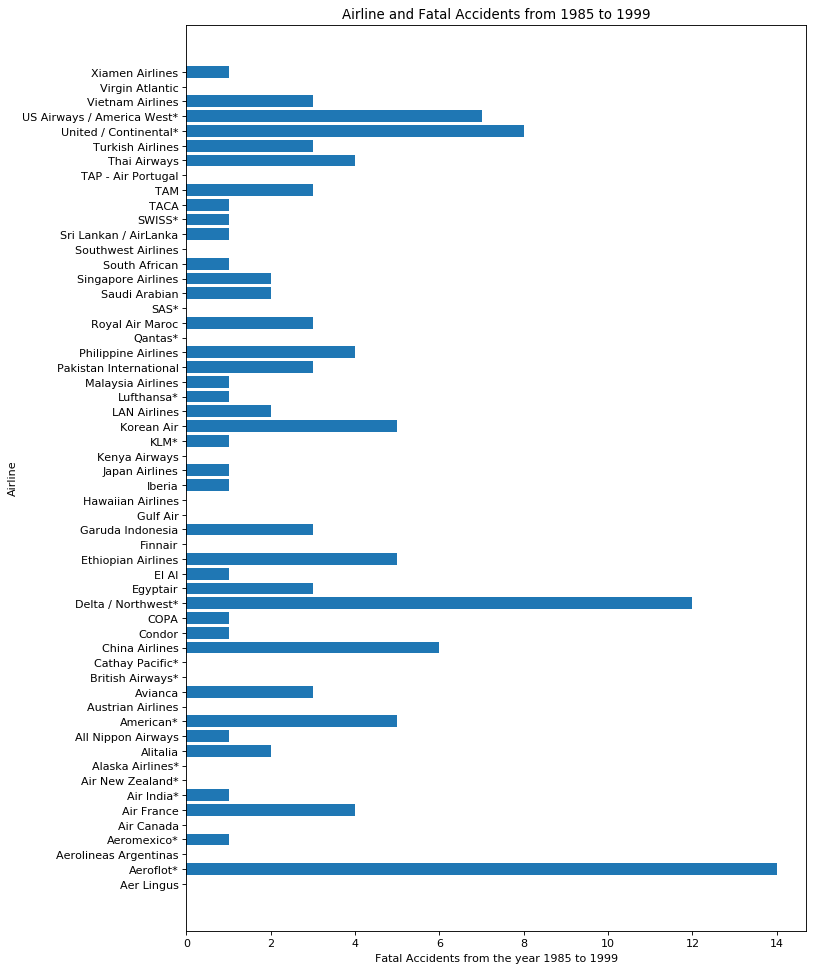

In [5]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 15), dpi=80, facecolor='w', edgecolor='k')
plt.barh(df_data_1['airline'], df_data_1['fatal_accidents_85_99'])
plt.xlabel('Fatal Accidents from the year 1985 to 1999')
plt.ylabel('Airline')
plt.title('Airline and Fatal Accidents from 1985 to 1999')

Text(0.5, 1.0, 'Airline and Fatal Accidents from 2000 to 2014')

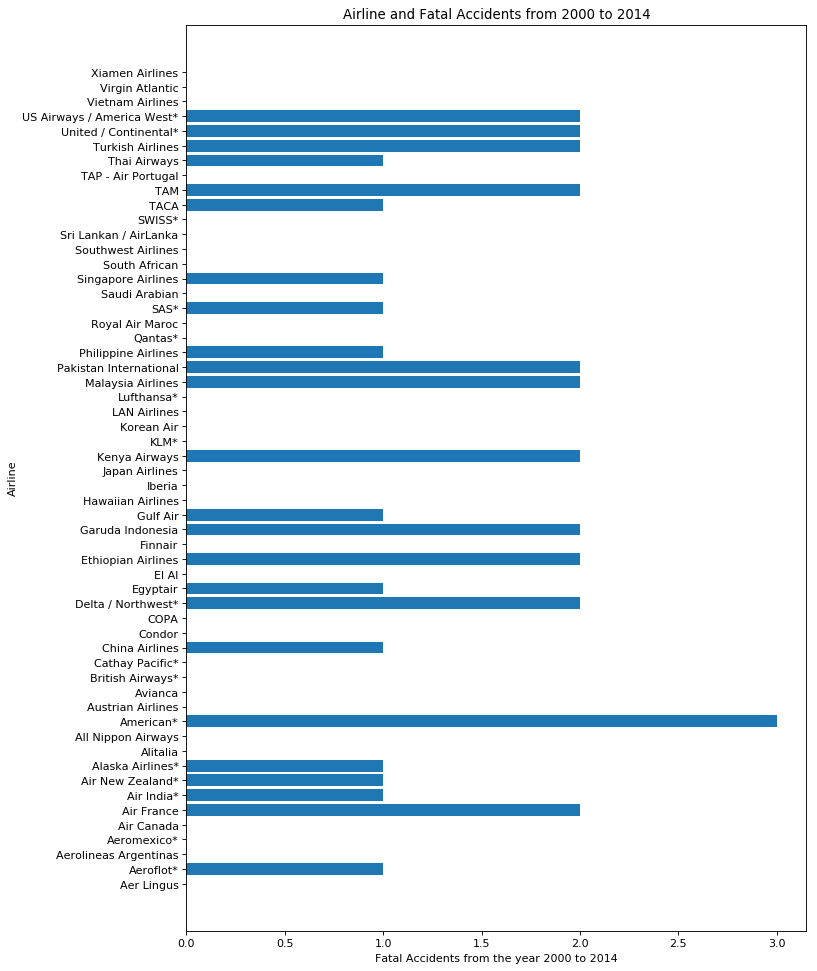

In [6]:
figure(num=None, figsize=(10, 15), dpi=80, facecolor='w', edgecolor='k')
plt.barh(df_data_1['airline'], df_data_1['fatal_accidents_00_14'])
plt.xlabel('Fatal Accidents from the year 2000 to 2014')
plt.ylabel('Airline')
plt.title('Airline and Fatal Accidents from 2000 to 2014')

In [13]:
bins = np.linspace(min(df_data_1['avail_seat_km_per_week']), max(df_data_1['avail_seat_km_per_week']), 4)
bins

array([2.59373346e+08, 2.55267933e+09, 4.84598531e+09, 7.13929129e+09])

In [14]:
group_names = ['low', 'medium', 'High']

In [15]:
df_data_1['avail_seat_km_per_week_binned'] = pd.cut(df_data_1['avail_seat_km_per_week'], bins, labels=group_names, include_lowest=True)
df_data_1[['airline','avail_seat_km_per_week','avail_seat_km_per_week_binned']].head()

,airline,avail_seat_km_per_week,avail_seat_km_per_week_binned
0,Aer Lingus,320906734,low
1,Aeroflot*,1197672318,low
2,Aerolineas Argentinas,385803648,low
3,Aeromexico*,596871813,low
4,Air Canada,1865253802,low


Text(0, 0.5, 'Value counts of airlines')

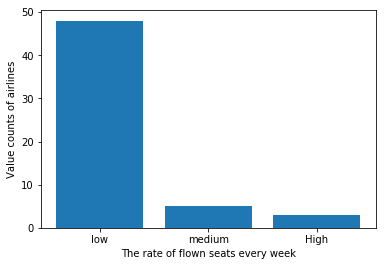

In [16]:

plt.bar(group_names, df_data_1['avail_seat_km_per_week_binned'].value_counts())
plt.xlabel('The rate of flown seats every week')
plt.ylabel('Value counts of airlines')

In [17]:
bins2 = np.linspace(min(df_data_1['incidents_00_14']), max(df_data_1['incidents_00_14']), 4)
df_data_1['incidents_00_14_binned'] = pd.cut(df_data_1['incidents_00_14'], bins2, labels=group_names, include_lowest=True)
df_data_1[['airline', 'incidents_00_14_binned']].head()

,airline,incidents_00_14_binned
0,Aer Lingus,low
1,Aeroflot*,low
2,Aerolineas Argentinas,low
3,Aeromexico*,low
4,Air Canada,low


Text(0.5, 1.0, 'Airline incidents rate from 2000 to 2014')

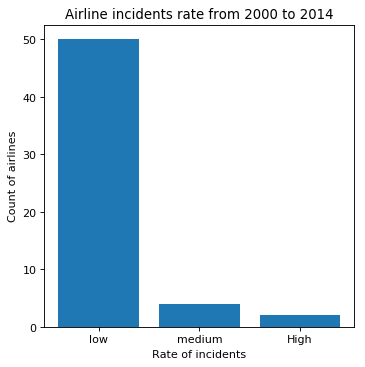

In [18]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(group_names, df_data_1['incidents_00_14_binned'].value_counts())
plt.xlabel('Rate of incidents')
plt.ylabel('Count of airlines')
plt.title('Airline incidents rate from 2000 to 2014')

In [19]:
df_data_1.corr()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
avail_seat_km_per_week,1.000000,0.279538,0.468300,0.209835,0.725917,0.375673,0.228484
incidents_85_99,0.279538,1.000000,0.856991,0.274394,0.403009,0.390249,0.195337
fatal_accidents_85_99,0.468300,0.856991,1.000000,0.540866,0.572923,0.498758,0.186985
fatalities_85_99,0.209835,0.274394,0.540866,1.000000,0.273696,0.228180,0.046979
incidents_00_14,0.725917,0.403009,0.572923,0.273696,1.000000,0.598071,0.282009
fatal_accidents_00_14,0.375673,0.390249,0.498758,0.228180,0.598071,1.000000,0.695864
fatalities_00_14,0.228484,0.195337,0.186985,0.046979,0.282009,0.695864,1.000000


In [20]:
import seaborn as sns
from scipy import stats

In [21]:
pearson_coef, p_value = stats.pearsonr(df_data_1['avail_seat_km_per_week'], df_data_1['fatalities_85_99'])
print('The determination coeffecient is ', pearson_coef, '  and p value is ',  p_value)

The determination coeffecient is  0.20983501194121232   and p value is  0.12061870894018263


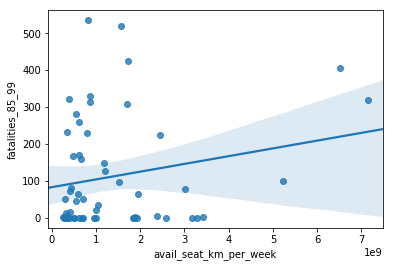

In [22]:
sns.regplot(x='avail_seat_km_per_week', y='fatalities_85_99', data=df_data_1)


In [31]:
df=df_data_1[['airline', 'fatalities_85_99','fatal_accidents_85_99' ,'fatalities_00_14', 'fatal_accidents_00_14']]

In [32]:
df.head()

,airline,fatalities_85_99,fatal_accidents_85_99,fatalities_00_14,fatal_accidents_00_14
0,Aer Lingus,0,0,0,0
1,Aeroflot*,128,14,88,1
2,Aerolineas Argentinas,0,0,0,0
3,Aeromexico*,64,1,0,0
4,Air Canada,0,0,0,0


In [33]:
names= df['airline'].values.tolist()
df.drop(['airline'], axis=1, inplace=True)
df.index = names

In [34]:
df.head()

,fatalities_85_99,fatal_accidents_85_99,fatalities_00_14,fatal_accidents_00_14
Aer Lingus,0,0,0,0
Aeroflot*,128,14,88,1
Aerolineas Argentinas,0,0,0,0
Aeromexico*,64,1,0,0
Air Canada,0,0,0,0


In [35]:
df.dtypes

fatalities_85_99         int64
fatal_accidents_85_99    int64
fatalities_00_14         int64
fatal_accidents_00_14    int64
dtype: object

In [36]:
df.loc['Air Canada']

fatalities_85_99         0
fatal_accidents_85_99    0
fatalities_00_14         0
fatal_accidents_00_14    0
Name: Air Canada, dtype: int64

In [37]:
def airline_fatalitiy(airline_name):
    result = df.loc[airline_name]
    return result
airline_fatalitiy('Aer Lingus')

fatalities_85_99         0
fatal_accidents_85_99    0
fatalities_00_14         0
fatal_accidents_00_14    0
Name: Aer Lingus, dtype: int64

In [39]:
airline_fatalitiy('Aeroflot*')

fatalities_85_99         128
fatal_accidents_85_99     14
fatalities_00_14          88
fatal_accidents_00_14      1
Name: Aeroflot*, dtype: int64

In [58]:
df_00_14 = df[['fatalities_00_14', 'fatal_accidents_00_14']]
df_00_14.head()

,fatalities_00_14,fatal_accidents_00_14
Aer Lingus,0,0
Aeroflot*,88,1
Aerolineas Argentinas,0,0
Aeromexico*,0,0
Air Canada,0,0


In [60]:
df_00_14_safe_airlines = df_00_14[df_00_14['fatalities_00_14']< 10]
df_00_14_safe_airlines

,fatalities_00_14,fatal_accidents_00_14
Aer Lingus,0,0
Aerolineas Argentinas,0,0
Aeromexico*,0,0
Air Canada,0,0
Air New Zealand*,7,1
Alitalia,0,0
All Nippon Airways,0,0
Austrian Airlines,0,0
Avianca,0,0
British Airways*,0,0
